In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


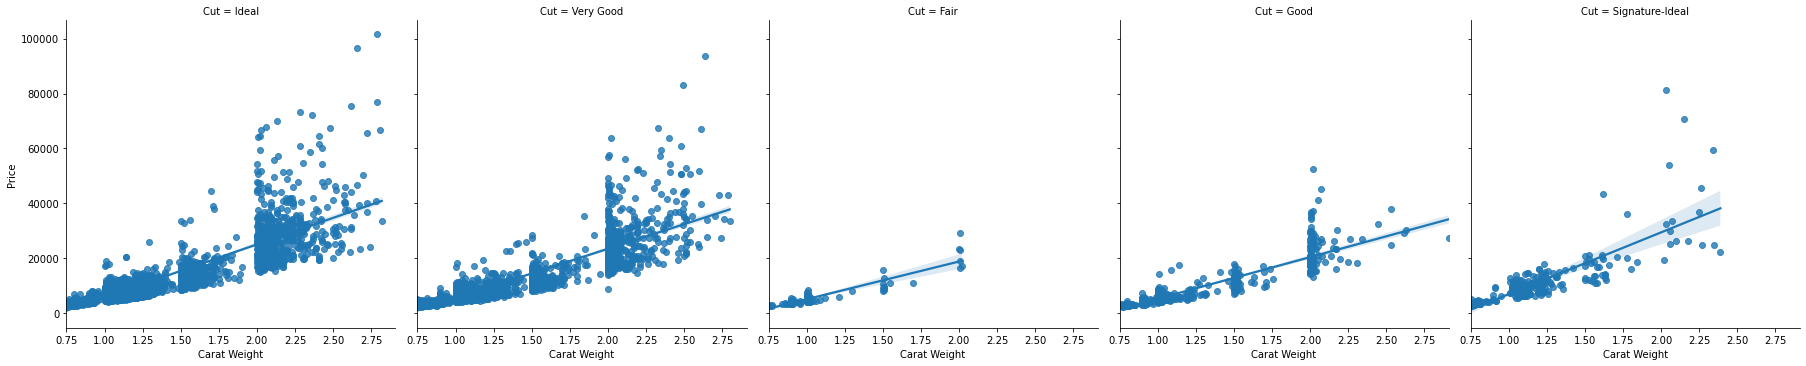

In [4]:
sns.lmplot(x="Carat Weight", y="Price", data = data, col="Cut")
plt.show()

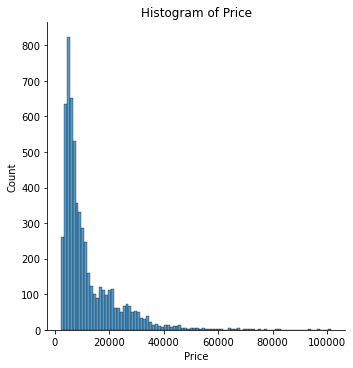

In [5]:
# Target distribution
sns.displot(data=data, x="Price")
plt.title("Histogram of Price")
plt.show()

In [6]:
# create a copy of data
data_copy = data.copy()# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])

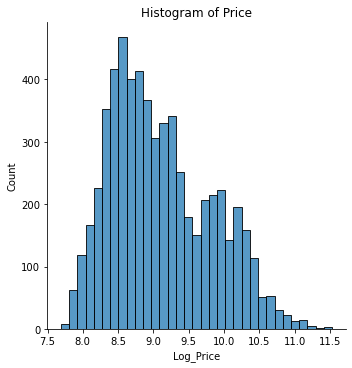

In [7]:
sns.displot(data=data_copy, x="Log_Price")
plt.title("Histogram of Price")
plt.show()

In [8]:
# init setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True)

,Description,Value
0,session_id,4572
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [28]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,577.2807,1689718.6510,1243.0357,0.9836,0.0620,0.0449,0.3810
lightgbm,Light Gradient Boosting Machine,616.5210,1762471.0746,1286.2445,0.9828,0.0657,0.0482,0.0470
xgboost,Extreme Gradient Boosting,656.8723,1887969.3812,1338.9884,0.9815,0.0694,0.0511,0.1880
rf,Random Forest Regressor,712.2956,2249659.9077,1453.3809,0.9778,0.0779,0.0566,0.1450
et,Extra Trees Regressor,735.9206,2336103.2472,1500.2567,0.9767,0.0805,0.0585,0.1800
gbr,Gradient Boosting Regressor,744.8629,2789573.2805,1587.4840,0.9734,0.0773,0.0571,0.0440
dt,Decision Tree Regressor,919.3571,3495951.6414,1829.2282,0.9654,0.1004,0.0726,0.0080
ada,AdaBoost Regressor,1988.8263,16247554.5986,3971.2705,0.8390,0.1905,0.1539,0.0410
knn,K Neighbors Regressor,3017.6116,35507608.3300,5923.2306,0.6418,0.3637,0.2312,0.0150
omp,Orthogonal Matching Pursuit,3301.8823,86173413.9762,9028.8587,0.1109,0.2838,0.2233,0.0050


In [29]:
ctb = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,642.4262,4458876.7100,2111.6052,0.9613,0.0704,0.0459
1,566.5401,1410634.5457,1187.7014,0.9856,0.0599,0.0447
2,654.1524,2990106.8010,1729.1925,0.9761,0.0603,0.0447
3,487.0848,707616.6556,841.1995,0.9929,0.0584,0.0426
4,451.6212,632048.9853,795.0151,0.9922,0.0538,0.0414
5,553.0274,1042165.8211,1020.8652,0.9891,0.0603,0.0440
6,571.8681,1086939.6570,1042.5640,0.9892,0.0608,0.0451
7,645.2251,1524241.8796,1234.6019,0.9860,0.0616,0.0478
8,628.5675,1521881.9577,1233.6458,0.9811,0.0651,0.0470
9,572.2945,1522673.4966,1233.9666,0.9823,0.0698,0.0458


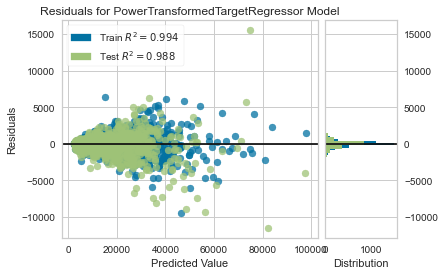

In [31]:
# check the residuals of trained model
plot_model(ctb)

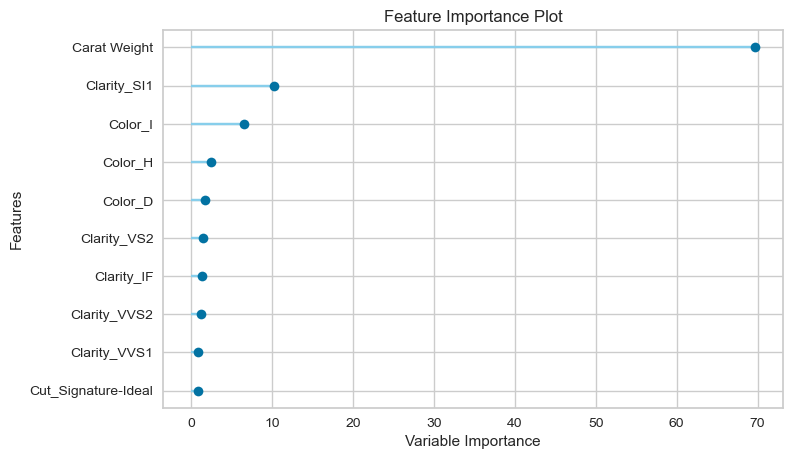

In [32]:
plot_model(ctb, plot = 'feature')

In [33]:
# finalize the model
final_best = finalize_model(ctb)# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254,
                                                  loss_function